In [3]:
import csv
from datetime import datetime
import requests
import pandas as pd
import json
import math
import time
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

from IPython.core.display import HTML

In [4]:
cwd = os.getcwd()

In [143]:
usernational = pd.read_json(cwd+"/usersnational.json")
usercampus = pd.read_json(cwd+"/usersnationalxp.json")

usercampus = usercampus.rename(columns={'firstName': 'login'})

In [242]:
merged = usernational.merge(usercampus, on='login', how="outer")
merged.to_csv(cwd+"/assets/files/merge_data_user.csv", index=False)

In [6]:
userfinalnational = usercampus = pd.read_csv(cwd+"/assets/files/merge_data_user.csv")

In [7]:
userfinalnational.shape

(1376, 24)

In [8]:
userfinalnational.columns

Index(['id', 'login', 'full_name_x', 'email_x', 'avatar_url_x', 'language_x',
       'is_admin_x', 'last_login_x', 'created_x', 'restricted_x', 'username_x',
       'id_x', 'full_name_y', 'email_y', 'avatar_url_y', 'language_y',
       'is_admin_y', 'last_login_y', 'created_y', 'restricted_y', 'username_y',
       'campus', 'id_y', 'xp'],
      dtype='object')

In [9]:
userfinalnational["xp"] = userfinalnational["xp"].replace(r'\D+', '', regex=True)

In [10]:
userfinalnational["xp"] = userfinalnational["xp"].replace(r'', 0, regex=True)

In [11]:
userfinalnational["xp"] = userfinalnational["xp"].astype('float')

In [12]:
xpuser = userfinalnational.sort_values(by="xp", ascending=False)

In [13]:
def count_na_percent(df, threshold) : 
    mask = df.isna().sum() > threshold
    missing_values_count = df.isna().sum()
    return (missing_values_count[mask] / len(df) *100).sort_values(ascending=False)

In [14]:
count_na_percent(xpuser, 0)

campus          54.433140
full_name_y      4.433140
full_name_x      4.433140
id_y             3.125000
xp               3.125000
language_x       2.761628
language_y       2.761628
email_x          2.398256
avatar_url_x     2.398256
username_y       2.398256
restricted_y     2.398256
created_y        2.398256
last_login_y     2.398256
is_admin_y       2.398256
avatar_url_y     2.398256
is_admin_x       2.398256
email_y          2.398256
id_x             2.398256
username_x       2.398256
restricted_x     2.398256
created_x        2.398256
last_login_x     2.398256
id               2.398256
login            1.744186
dtype: float64

In [15]:
xpuser = xpuser[xpuser["xp"] !=0]
xpuser = xpuser.dropna()
xpuser["xp"] = xpuser["xp"].astype('int')
xpuser

,id,login,full_name_x,email_x,avatar_url_x,language_x,is_admin_x,last_login_x,created_x,restricted_x,...,avatar_url_y,language_y,is_admin_y,last_login_y,created_y,restricted_y,username_y,campus,id_y,xp
624,311.0,LBARTHELEMY1,Lucas Barthélémy,lucas.barthelemy@ynov.com,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,False,2021-11-29T08:05:40Z,2020-09-14T10:07:49Z,False,...,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,False,2021-11-29T08:05:40Z,2020-09-14T10:07:49Z,False,LBARTHELEMY1,lyon,310.0,1676437
1185,1135.0,TLEMAITRE1,TLEMAITRE1,thomas.lemaitre@ynov.com,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,False,2022-07-05T20:48:01Z,2021-10-13T08:28:14Z,False,...,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,False,2022-07-05T20:48:01Z,2021-10-13T08:28:14Z,False,TLEMAITRE1,pyc,1107.0,1592323
1225,619.0,TWEBER1,TWEBER1,thomas.weber@ynov.com,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,False,2022-07-08T20:02:19Z,2021-09-07T11:41:23Z,False,...,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,False,2022-07-08T20:02:19Z,2021-09-07T11:41:23Z,False,TWEBER1,bordeaux,598.0,1583612
393,9.0,ERUAUD,ERUAUD,emmanuel.ruaud@ynov.com,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,True,2022-03-04T14:34:37Z,2020-09-02T09:43:36Z,False,...,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,True,2022-03-04T14:34:37Z,2020-09-02T09:43:36Z,False,ERUAUD,lyon,14.0,1552152
700,1130.0,LMORGADO,LMORGADO,luca.morgado@ynov.com,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,False,2022-07-27T21:37:51Z,2021-10-13T08:26:54Z,False,...,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,False,2022-07-27T21:37:51Z,2021-10-13T08:26:54Z,False,LMORGADO,pyc,1102.0,1492107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,30.0,SPLOTTU,SPLOTTU,sebastien.plottu@ynov.com,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,True,2021-08-20T09:16:55Z,2020-09-09T08:32:27Z,False,...,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,True,2021-08-20T09:16:55Z,2020-09-09T08:32:27Z,False,SPLOTTU,nantes,32.0,500
159,368.0,ASANGARE,ASANGARE,assanemohamed.sangare@ynov.com,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,False,2020-09-28T10:04:29Z,2020-09-23T07:27:39Z,False,...,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,False,2020-09-28T10:04:29Z,2020-09-23T07:27:39Z,False,ASANGARE,pyc,366.0,488
1130,10.0,SPLOTTU1,SPLOTTU1,s.plottu@ynov.com,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,True,2022-04-11T07:29:47Z,2020-09-02T10:57:46Z,False,...,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,True,2022-04-11T07:29:47Z,2020-09-02T10:57:46Z,False,SPLOTTU1,nantes,15.0,263
797,1023.0,MDIALLO10,MDIALLO10,mamadou.diallo@ynov.com,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,False,2021-11-03T09:55:01Z,2021-09-28T10:07:46Z,False,...,https://git.ytrack.learn.ynov.com/user/avatar/...,en-US,False,2021-11-03T09:55:01Z,2021-09-28T10:07:46Z,False,MDIALLO10,toulouse,1001.0,263


In [16]:
main_variables = xpuser.groupby('login', as_index=False).agg({'xp': 'mean'})
main_variables

,login,xp
0,AABADIE,543897.0
1,AABELLA,174690.0
2,ABA,180389.0
3,ABEL,56229.0
4,ABELAIDOUNI,573596.0
...,...,...
601,YZAOUI,1175675.0
602,ZMEFTAH,36839.0
603,ZNONIASHVILI,106494.0
604,ZSOULA,907999.0


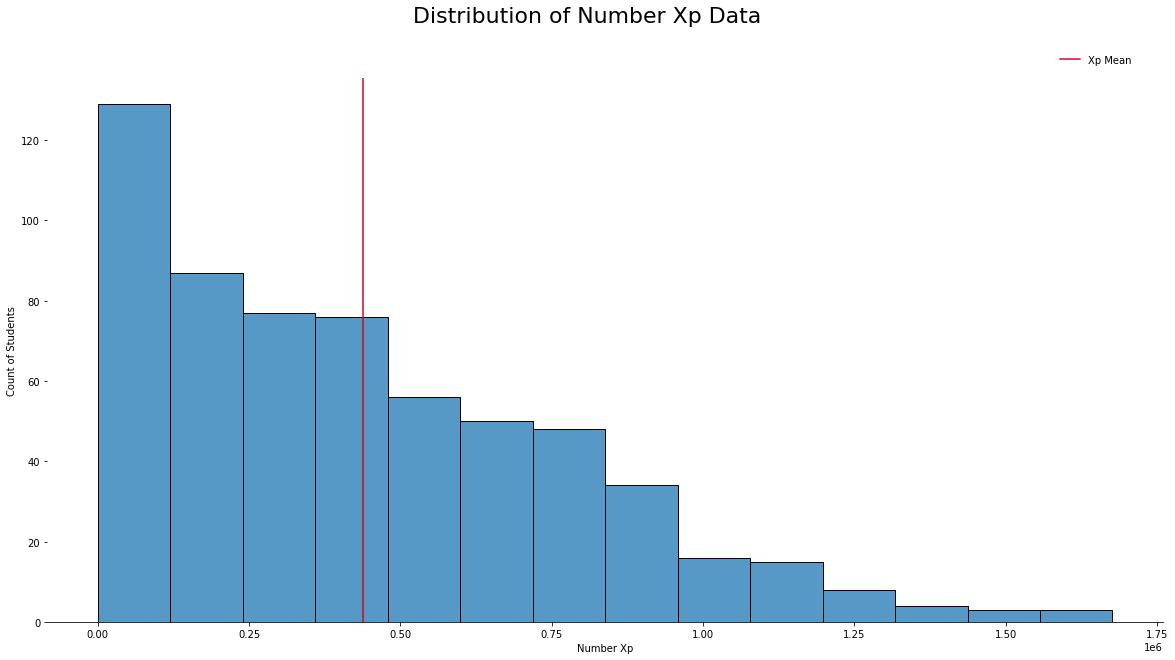

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(main_variables ['xp'], ax=ax, label='_nolegend_', kde=False)
ax.axvline(main_variables ['xp'].mean(), color='#c9082a', label='Xp Mean')

ax.yaxis.set_label_text('Count of Students')
ax.xaxis.set_label_text('Number Xp')
plt.suptitle('Distribution of Number Xp Data', fontsize=22)
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 1.06), frameon=False)
sns.despine(ax=ax, left=True)

plt.show()

In [18]:
fig = go.Figure(data=go.Scatter(x=main_variables['xp'],
                                mode='markers',
                                text=main_variables['login'],
                                marker=dict(color='#17408b')
                                ))

fig.update_layout(
    title='Distribution of Number Xp Data (interactive exploration)',
    xaxis_title='Number Xp',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()

In [19]:
filter = xpuser["campus"]=="pyc"

userPYC = xpuser.where(filter, inplace = False)

userPYC = userPYC.dropna()
userPYC = userPYC.sort_values(by='xp', ascending=False)

pyc         166
bordeaux    147
toulouse    107
lyon         93
nantes       56
aix          37

In [20]:
# si je selectionne les campus d'aix et de nantes, la moyenne sera fausse comparé aux autres campus car ils sont x3 voir x4 moins nombreux que 
# les autres campus
xpuser_aix = xpuser[xpuser['campus'] != 'aix']
xpuser_aix_nantes = xpuser_aix[xpuser_aix['campus'] != 'nantes']

<AxesSubplot:xlabel='campus'>

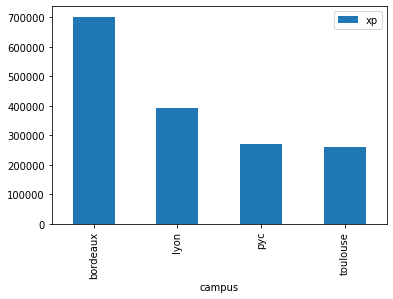

In [21]:
campus = xpuser_aix_nantes.groupby(['campus']).mean()

campus.plot.bar(y=['xp'])

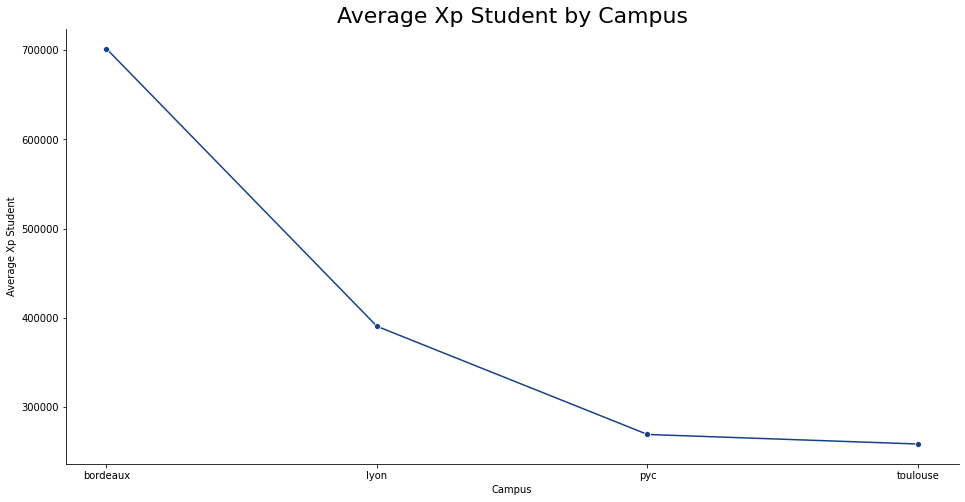

In [22]:
plt.figure(figsize=(16, 8))

xp_by_campus = xpuser_aix_nantes.groupby(['campus'])['xp'].agg(['mean', 'count'])

sns.lineplot(x=xp_by_campus.index, y='mean', data=xp_by_campus, marker='o', color='#17408b')

plt.title('Average Xp Student by Campus', fontsize=22)
plt.ylabel('Average Xp Student')
plt.xlabel('Campus')
sns.despine()

plt.show()

array([<AxesSubplot:ylabel='campus'>], dtype=object)

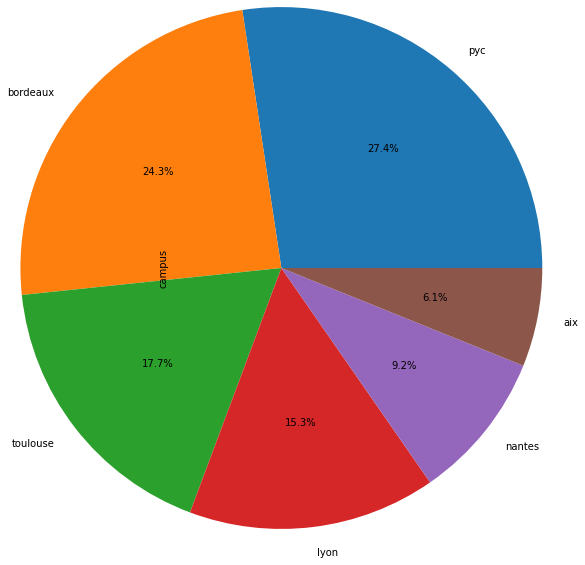

In [26]:
dc = xpuser["campus"].value_counts().to_frame()
dc["campus"].plot.pie(subplots=True,radius = 3,labeldistance= 1.1,autopct='%1.1f%%',legend=False)

In [224]:
xpuser.columns

Index(['id_x', 'login', 'full_name', 'email', 'avatar_url', 'language',
       'is_admin', 'last_login', 'created', 'restricted', 'username', 'campus',
       'id_y', 'xp'],
      dtype='object')

In [239]:
top20 = xpuser[['xp','login']]
top20.sort_values('xp',ascending=False).head(20)

,xp,login
624,1676437,LBARTHELEMY1
1185,1592323,TLEMAITRE1
1225,1583612,TWEBER1
393,1552152,ERUAUD
700,1492107,LMORGADO
266,1445325,COBEJERO
408,1390696,FCOURDESSE
285,1379438,CVEY
419,1377787,FGARCIA5
1211,1333524,TROGARD


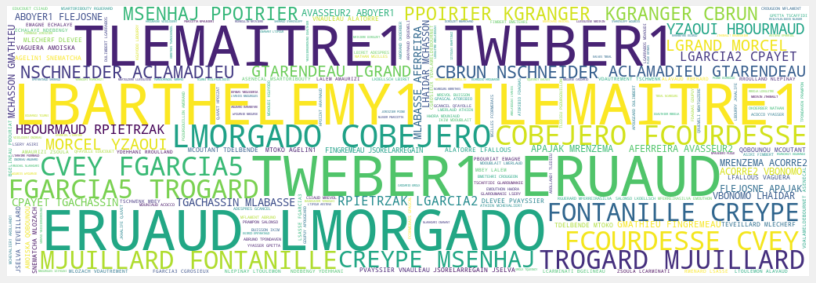

In [243]:
example_string = top20.to_string()
output_file = open('assets/files/top20.txt','a')
output_file.write(example_string)
output_file.close()

text = ""
with open('assets/files/top20.txt', encoding='utf-8') as f:
    text = ''.join(f.readlines())
    
wc = WordCloud()

wc.generate(text)
    
custom_mask = np.array(Image.open("assets/img/zone01.png"))
wc = WordCloud(background_color="white", mask=custom_mask)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('assets/img/top20.png')

In [245]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

In [252]:
user_avatar = xpuser.drop(columns=['id_x', 'full_name','language', 'is_admin','last_login', 'created','restricted', 'username','id_y','email'])

In [253]:
HTML(user_avatar.to_html(escape=False,formatters=dict(avatar_url=path_to_image_html)))

,login,avatar_url,campus,xp
624,LBARTHELEMY1,,lyon,1676437
1185,TLEMAITRE1,,pyc,1592323
1225,TWEBER1,,bordeaux,1583612
393,ERUAUD,,lyon,1552152
700,LMORGADO,,pyc,1492107
266,COBEJERO,,nantes,1445325
408,FCOURDESSE,,lyon,1390696
285,CVEY,,lyon,1379438
419,FGARCIA5,,bordeaux,1377787
1211,TROGARD,,bordeaux,1333524
